# Brain Tumor Identification 
---------------
## **Context**
----------------

Brain tumor among children and adults is known to be one of the most aggressive diseases. Of all primary Central Nervous System (CNS) tumors, brain tumors account for 85 to 90 percent. Around 11,700 individuals are diagnosed with a brain tumor every year. For individuals with a cancerous brain or CNS tumor, the 5-year survival rate is around 34 percent for men and 36 percent for women. Brain Tumors are known as: Benign Tumor, Pituitary Tumor, Malignant Tumor, etc. In order to increase the life expectancy of patients, adequate care, preparation, and reliable diagnostics should be introduced. Magnetic Resonance Imaging (MRI) is the best way to identify brain tumors. Through the scans, a huge amount of image data is produced. There are several anomalies in the brain tumor size and location (s). This makes it very difficult to completely comprehend the nature of the tumor. For MRI analysis, a trained neurosurgeon is also needed. The lack of qualified doctors and lack of knowledge about tumors also makes it very difficult and time-consuming for developing countries to produce MRI studies. Due to the level of difficulty involved in brain tumors and their properties, a manual analysis can be error-prone. So an automated system can solve this problem. 

Application of automated classification techniques using Machine Learning (ML) and Artificial Intelligence (AI) has consistently shown higher accuracy than manual classification. It would therefore be beneficial to propose a method that performs detection and classification using Deep Learning Algorithms.

-----------------
## **Objective**
------------------

To build a classification model that can take images of MRI scans as an input and can identify whether the person has brain tumor or not.

----------------------
## **Data Dictionary**
----------------------

- The dataset contains MRI scans converted to NumPy arrays. There are two classes in the data: 
    - yes: These are MRI scans of brains with tumors.
    - no: These are MRI scans of brains without tumors.

## **Importing the required Libraries**

In [ ]:
# Importing libraries required to load the data

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import zipfile
from PIL import Image

# Importing Deep Learning Libraries

from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

We will be using **Google Colab** to run this notebook. 

First, let's **import the data** so that Colab can access the dataset.

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/brain_tumor_dataset.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

The 'brain_tumor_dataset' folder has three folders, namely train, validation, and test. Each of these three folders has two folders, namely 'yes' and 'no'. The folders named 'yes' contains MRI scans of brains having tumors and the folders named 'no' contain MRI scans of healthy brains.

In [ ]:
picture_size = 48
folder_path = "brain_tumor_dataset/"

## **Visualizing MRI scans showing tumors**

First, we are visualizing MRI scans that exhibit the presence of a tumor.

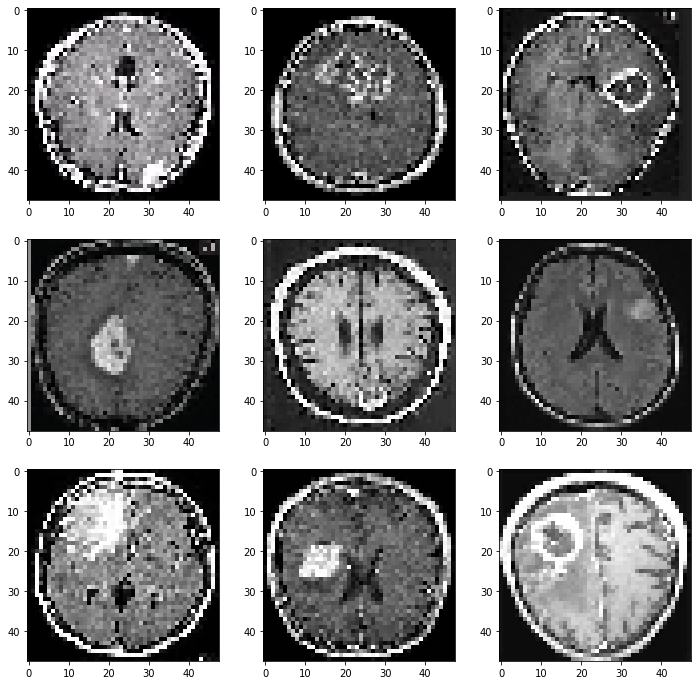

In [ ]:
tumor_presence = 'yes'

# The following code plots the first nine images in the folder 'yes'.
plt.figure(figsize = (12, 12)) 

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path +'train/' + tumor_presence + "/" +
                  os.listdir(folder_path + 'train/' + tumor_presence)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

## **Visualizing MRI scans without tumors**

Then let's see what MRI scans of healthy brains look like.

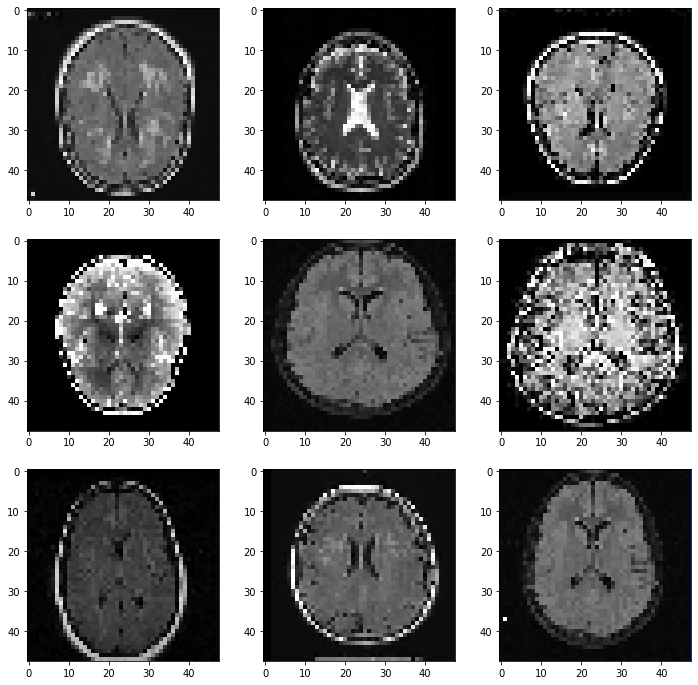

In [ ]:
tumor_presence = 'no'

# The following code plots the first nine images in the folder 'no'.
plt.figure(figsize = (12, 12))

for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + 'train/' + tumor_presence + "/" +
                  os.listdir(folder_path + 'train/' + tumor_presence)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations:**

- The MRI scans of brains that have tumors have patches (white or gray) of varying sizes and they are present at different locations within the cross-sectional view of the brain.
- The MRI scans of healthy brains show no such patches.

## **Creating Training and Testing Image Data Generators**

Let's create data loaders to pass to the neural network architectures. We will let the train, validation, and test data loaders take the images from their respective folders.

In [ ]:
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_test = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path + 'train/',
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['no', 'yes'],
                                              shuffle = True)

validation_set = datagen_val.flow_from_directory(folder_path + 'validation/',
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['no', 'yes'],
                                              shuffle = True)

test_set = datagen_test.flow_from_directory(folder_path + 'test/',
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['no', 'yes'],
                                              shuffle = True)

Found 2712 images belonging to 2 classes.
Found 288 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


## **Model Building**

### **Artificial Neural Network (ANN)**

Let's create an ANN model sequentially, where we will be adding the layers one after another. Unlike Convolutional Neural Networks, Artificial Neural Networks cannot have images as inputs. We need to pass tabular data to Artificial Neural Networks. Therefore we need to Flatten the images to convert it into 1-D arrays before we feed it to the Fully Connected Layers. Therefore, our first layer in the ANN while working with image data should be a 'Flatten' layer.

In [ ]:
ann_model = Sequential() 

ann_model.add(Flatten(input_shape = (48, 48, 1)))

# Dense or Fully Connected Layers
ann_model.add(Dense(64, kernel_initializer = 'he_normal', activation = 'tanh'))
ann_model.add(Dense(128, kernel_initializer = 'he_normal', activation = 'tanh'))
ann_model.add(Dense(256, kernel_initializer = 'he_normal', activation = 'tanh'))

# Classifier
ann_model.add(Dense(2, activation = 'sigmoid'))

# Adam optimizer with 0.0001 learning rate
adam = Adam(0.0001)

# Compiling the model
ann_model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [ ]:
# Model summary
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                147520    
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 189,378
Trainable params: 189,378
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting the model
history1 = ann_model.fit(train_set,
                                steps_per_epoch = train_set.n//train_set.batch_size,
                                epochs = 10,
                                validation_data = validation_set
                                )

Epoch 1/10
21/21 [==============================] - 9s 403ms/step - loss: 0.6737 - accuracy: 0.6196 - val_loss: 0.6148 - val_accuracy: 0.6910
Epoch 2/10
21/21 [==============================] - 8s 373ms/step - loss: 0.6032 - accuracy: 0.6811 - val_loss: 0.5782 - val_accuracy: 0.6632
Epoch 3/10
21/21 [==============================] - 8s 406ms/step - loss: 0.5770 - accuracy: 0.7005 - val_loss: 0.5814 - val_accuracy: 0.6840
Epoch 4/10
21/21 [==============================] - 7s 355ms/step - loss: 0.5516 - accuracy: 0.7144 - val_loss: 0.5735 - val_accuracy: 0.7222
Epoch 5/10
21/21 [==============================] - 9s 416ms/step - loss: 0.5319 - accuracy: 0.7299 - val_loss: 0.5201 - val_accuracy: 0.7500
Epoch 6/10
21/21 [==============================] - 8s 374ms/step - loss: 0.5127 - accuracy: 0.7396 - val_loss: 0.4874 - val_accuracy: 0.7361
Epoch 7/10
21/21 [==============================] - 8s 379ms/step - loss: 0.5108 - accuracy: 0.7450 - val_loss: 0.4709 - val_accuracy: 0.7778
Epoch 

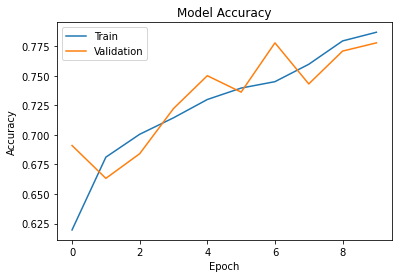

In [ ]:
# Plotting training and validation accuracies with the number of epochs on the X-axis 
plt.plot(history1.history['accuracy'])

plt.plot(history1.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

**Observations:**

- The validation accuracy showed little fluctuations over 10 epochs.
- After 10 epochs, the model is giving similar training and validation accuracies of about 77%.
- One of the possible reasons can be local spatiality, i.e., since these tumors are present at varying locations within these MRI scans, ANNs wouldn't be able to adjust their weights to detect their presence at a particular location within the image. We can try CNN models to resolve the issue due to local spatiality.

### **Convolutional Neural Network (CNN)**

Let's create a CNN model and see if we get better accuracy than the ANN model.

In [ ]:
model1 = Sequential()

# First Convolutional block
model1.add(Conv2D(16, (3, 3), activation = 'relu', input_shape = (48, 48, 1)))
model1.add(MaxPooling2D(2, 2))

# Second Convolutional block
model1.add(Conv2D(32, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(2, 2))

# Flattening layer
model1.add(Flatten())

# Fully Connected layer
model1.add(Dense(128, activation = 'relu'))

# Classifier
model1.add(Dense(2, activation = 'sigmoid'))

# Adam optimizer with 0.0001 learning rate
adam = Adam(0.0001)

# Compiling the model
model1.compile(loss = "categorical_crossentropy", optimizer = adam, metrics = ['accuracy'])

# Model summary
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 21, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3200)              0         
                                                                 
 dense_9 (Dense)             (None, 128)              

In [ ]:
# Fitting the model
history2 = model1.fit(train_set,
                                steps_per_epoch = train_set.n//train_set.batch_size,
                                epochs = 10,
                                validation_data = validation_set
                                )

Epoch 1/10
21/21 [==============================] - 12s 526ms/step - loss: 3.8952 - accuracy: 0.6525 - val_loss: 1.6745 - val_accuracy: 0.7083
Epoch 2/10
21/21 [==============================] - 11s 495ms/step - loss: 1.8878 - accuracy: 0.6997 - val_loss: 1.7338 - val_accuracy: 0.7431
Epoch 3/10
21/21 [==============================] - 10s 497ms/step - loss: 1.3863 - accuracy: 0.7531 - val_loss: 1.3544 - val_accuracy: 0.7222
Epoch 4/10
21/21 [==============================] - 12s 541ms/step - loss: 1.1102 - accuracy: 0.7748 - val_loss: 1.0192 - val_accuracy: 0.7951
Epoch 5/10
21/21 [==============================] - 10s 494ms/step - loss: 0.7773 - accuracy: 0.8197 - val_loss: 0.8532 - val_accuracy: 0.8333
Epoch 6/10
21/21 [==============================] - 10s 518ms/step - loss: 0.6798 - accuracy: 0.8289 - val_loss: 0.9535 - val_accuracy: 0.7708
Epoch 7/10
21/21 [==============================] - 11s 505ms/step - loss: 0.5201 - accuracy: 0.8597 - val_loss: 0.5938 - val_accuracy: 0.8715

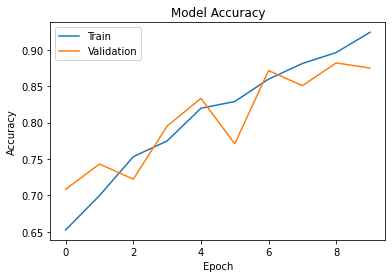

In [ ]:
# Plotting training and validation accuracies with the number of epochs on the X-axis
plt.plot(history2.history['accuracy'])

plt.plot(history2.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

**Observations:**

- Both the train and validation accuracies have improved in comparison to the ANN model.
- After 10 epochs, the training accuracy is about 92% and the validation accuracy is about 87%.
- We can further try to increase the model accuracy as even small errors can prove to be very costly in the field of medical research.
- We observe from the above graph that both train and validation accuracies are displaying an upward trend against the number of epochs. This shows that the model performance can improve further if we increase the model complexity or by training the model for more number of epochs. Below we are trying the former approach.

## **Increasing the complexity of the CNN Model**

Let's see if we can improve the model performance.

In [ ]:
model2 = Sequential()

# First CNN block
model2.add(Conv2D(64, (3, 3), padding = 'same', input_shape = (48, 48, 1)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size = (2, 2))) 

# Second CNN block
model2.add(Conv2D(128, (5, 5), padding = 'same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

# Third CNN block
model2.add(Conv2D(512, (5, 5), padding = 'same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

# Fourth CNN block
model2.add(Conv2D(512, (5, 5), padding = 'same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening layer
model2.add(Flatten())

# First fully connected layer
model2.add(Dense(256))
model2.add(Activation('relu'))

# Seconf fully connected layer
model2.add(Dense(512))
model2.add(Activation('relu'))

# Classifier
model2.add(Dense(2, activation = 'softmax'))

# Adam optimizer with 0.0001 learning rate
opt = Adam(learning_rate = 0.0001)

# Compiling the model
model2.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Model summary
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 activation_1 (Activation)   (None, 24, 24, 128)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                  

In [ ]:
# Fitting the model
history3 = model2.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs = 10,
                                validation_data = validation_set
                                )

Epoch 1/10
21/21 [==============================] - 246s 12s/step - loss: 2.3655 - accuracy: 0.5805 - val_loss: 0.5623 - val_accuracy: 0.7396
Epoch 2/10
21/21 [==============================] - 244s 12s/step - loss: 0.5271 - accuracy: 0.7442 - val_loss: 0.4932 - val_accuracy: 0.7743
Epoch 3/10
21/21 [==============================] - 244s 12s/step - loss: 0.4608 - accuracy: 0.7852 - val_loss: 0.4248 - val_accuracy: 0.8021
Epoch 4/10
21/21 [==============================] - 243s 12s/step - loss: 0.3843 - accuracy: 0.8367 - val_loss: 0.3409 - val_accuracy: 0.8646
Epoch 5/10
21/21 [==============================] - 242s 11s/step - loss: 0.3078 - accuracy: 0.8765 - val_loss: 0.2714 - val_accuracy: 0.8819
Epoch 6/10
21/21 [==============================] - 243s 12s/step - loss: 0.2775 - accuracy: 0.8928 - val_loss: 0.2804 - val_accuracy: 0.8924
Epoch 7/10
21/21 [==============================] - 245s 12s/step - loss: 0.2324 - accuracy: 0.9083 - val_loss: 0.1890 - val_accuracy: 0.9306
Epoch 

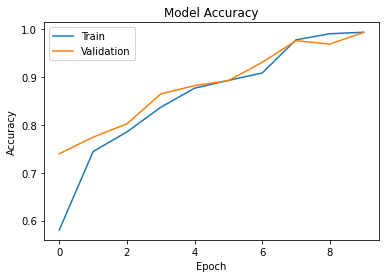

In [ ]:
# Plotting training and validation accuracies with the number of epochs on the X-axis
plt.plot(history3.history['accuracy'])

plt.plot(history3.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

**Observations:**

- The performance of this model is higher in comparison to the performance of previous models. We can see that we have received training and validation accuracies over 99%.
- The similar training and validation accuracies show that model is not overfitting the training data.
- The possible reason for such improvement is likely the higher number of trainable parameters. As suspected, the earlier models were not complex enough (less number of parameters) to have their weights adjust appropriately to identify the patterns in the images. Hence, we are choosing this model as the final model.

### **Evaluating Model Performance on the Test data**

In [ ]:
test_images, test_labels = next(test_set)
accuracy = model2.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

4/4 [==============================] - 2s 577ms/step - loss: 0.0475 - accuracy: 1.0000

 Test_Accuracy:- 1.0


**Observations:**

- The model is giving the test accuracy of 100%, which is similar to the training and validation accuracies.
- This shows that the final model can replicate its performance on unseen data.

### **Plotting Classification Matrix**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        73

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



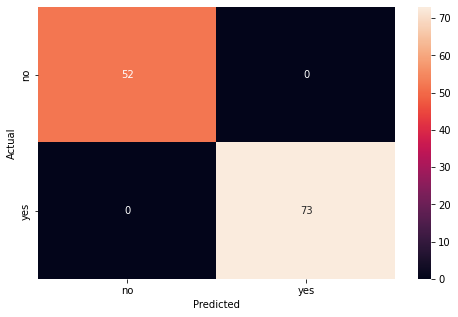

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['no', 'yes'], yticklabels = ['no', 'yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations:**
- We can observe from the confusion matrix that 100% of images having a tumor are classified correctly by the model. 
- Classifying a person with no tumor as having tumor is less severe than classifying a person with tumor as having no tumor because the former case can be caught in next stage clinical trials but the later case might go untreated and can prove fatal for the person. But model2 takes care of both these cases.
- Hence, we can say the model is reliable to be used in the field of medical research.

## **Conclusion**

- The aim of this  problem was to create a Deep Learning model to detect the presence of a brain tumor from MRI scan images. We visualized MRI scans of both types of brains, i.e., having tumor and not having tumor. We saw that brains having tumors had patches of white or gray pixels in either hemisphere of the brain.

- The first model was a Fully Connected Neural Network. We observed that the model did not perfom very well on the data at hand. The possible reasons were the lack of ANN's ability to tackle local spatiality as the white or gray patches were present at varying locations.

- The second and third models were Convolutional Neural Network architectures. The second model showed good improvement in comparsion to the performance of the first model. However, we chose to build another model, which is more reliable to be used in real world and having very low number of miclassifications. It would be fatal if it were to predict an MRI of an affected brain as being healthy. 

- Our third model's architecture was slightly more complex. It had many more Convolutional layers, which proved useful. They accurately predicted almost 100% of the MRI scans correctly. Therefore this is the final architecture we propose for this task.